# 202131066_Mohamad Tanwirul Akbar

# Regresi Linear

In [1]:
# Melakukan Import library pandas sebagai pd untuk mengolah data dengan format .csv
import pandas as pd

In [2]:
# Simpan nilai data file .csv pada Variabel datauts
datauts = pd.read_csv('R04_corruptions.csv')

In [3]:
# menampilkan 5 data teratas pada file .csv
datauts.head()

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60


In [4]:
# untuk menampilkan informasi pada kolom agar dapat dilanjutkan ke Split dan Train Data 
datauts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Corruption Perception (X)    55 non-null     float64
 1   Government Transparency (Y)  55 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


## Split Data

In [5]:
import numpy as np
# data transparansi pemerintahan
x_train = datauts['Corruption Perception (X)'].values[:, np.newaxis]
y_train = datauts['Government Transparency (Y)'].values

## Modelling

In [6]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(x_train, y_train)

LinearRegression()

## Koefisien dan Intercept

In [7]:
# Rumus Regresi -> y = ax + b (a = koefisien, b = intercept)
print("Koefisien : ", modelLR.coef_)
print("Intercept : ", modelLR.intercept_)

Koefisien :  [-10.92328395]
Intercept :  100.27173366009497


In [8]:
# testing rumus
y = modelLR.coef_ * 3.5 + modelLR.intercept_
print(y)

[62.04023982]


In [9]:
print("Akurasi Model Data :{}".format(modelLR.score(x_train,y_train)*100))

Akurasi Model Data :84.65157166961687


## Testing

In [10]:
x_train_test = [[1.2],[3.5]]
pred_GovTransparency = modelLR.predict(x_train_test)
print("Prediksi Transparansi Pemerintahan : ", pred_GovTransparency)

Prediksi Transparansi Pemerintahan :  [87.16379291 62.04023982]


## Visualisasi

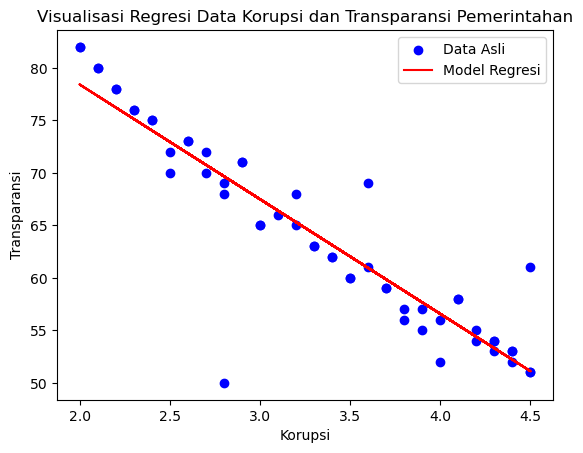

In [11]:
import matplotlib.pyplot as plt

prediksi_transparansi = modelLR.predict(x_train)
dataframe_baru = pd.DataFrame({'Korupsi': datauts['Corruption Perception (X)'], 'Transparansi': prediksi_transparansi})
plt.scatter(datauts['Corruption Perception (X)'], datauts['Government Transparency (Y)'], color="blue", label='Data Asli')
plt.plot(dataframe_baru.Korupsi, dataframe_baru.Transparansi, color="red", label='Model Regresi')
plt.xlabel('Korupsi')
plt.ylabel('Transparansi')
plt.title('Visualisasi Regresi Data Korupsi dan Transparansi Pemerintahan')
plt.legend()

plt.show()